<a href="https://colab.research.google.com/github/RodriCalle/ComplejidadAlgoritmica/blob/main/Mi_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import graphviz as gv

In [6]:
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

#Algorithm

In [7]:
qAlm = random.randint(50,100)
qEnt = random.randint(2500,5000)

almacenes, entregas = [], []

almacenx = np.random.randint(1,1000, size=qAlm)
almaceny = np.random.randint(1,1000, size=qAlm)

entregax = np.random.randint(1,1000, size=qEnt)
entregay = np.random.randint(1,1000, size=qEnt)

for i in range(qAlm):
  almacenes.append( [almacenx[i], almaceny[i]] )
for i in range(qEnt):
  entregas.append( [entregax[i], entregay[i]] )

#print("Cantidad de almacenes: ", qAlm)
#print(almacenes)
#print("Cantidad de puntos de entrega: ", qEnt)
#print(entregas)

In [8]:
almacenesFile = open('almacenes.csv', 'w')
with almacenesFile:
  writer = csv.writer(almacenesFile)
  writer.writerows(almacenes)

entregasFile = open('puntos_entrega.csv', 'w')
with entregasFile:
  writer = csv.writer(entregasFile)
  writer.writerows(entregas)

#with open('almacenes.csv', newline="") as almacenesFile:
#  reader = csv.reader(almacenesFile, delimiter=",")
#  for row in reader:
#    print(row)

#Figure

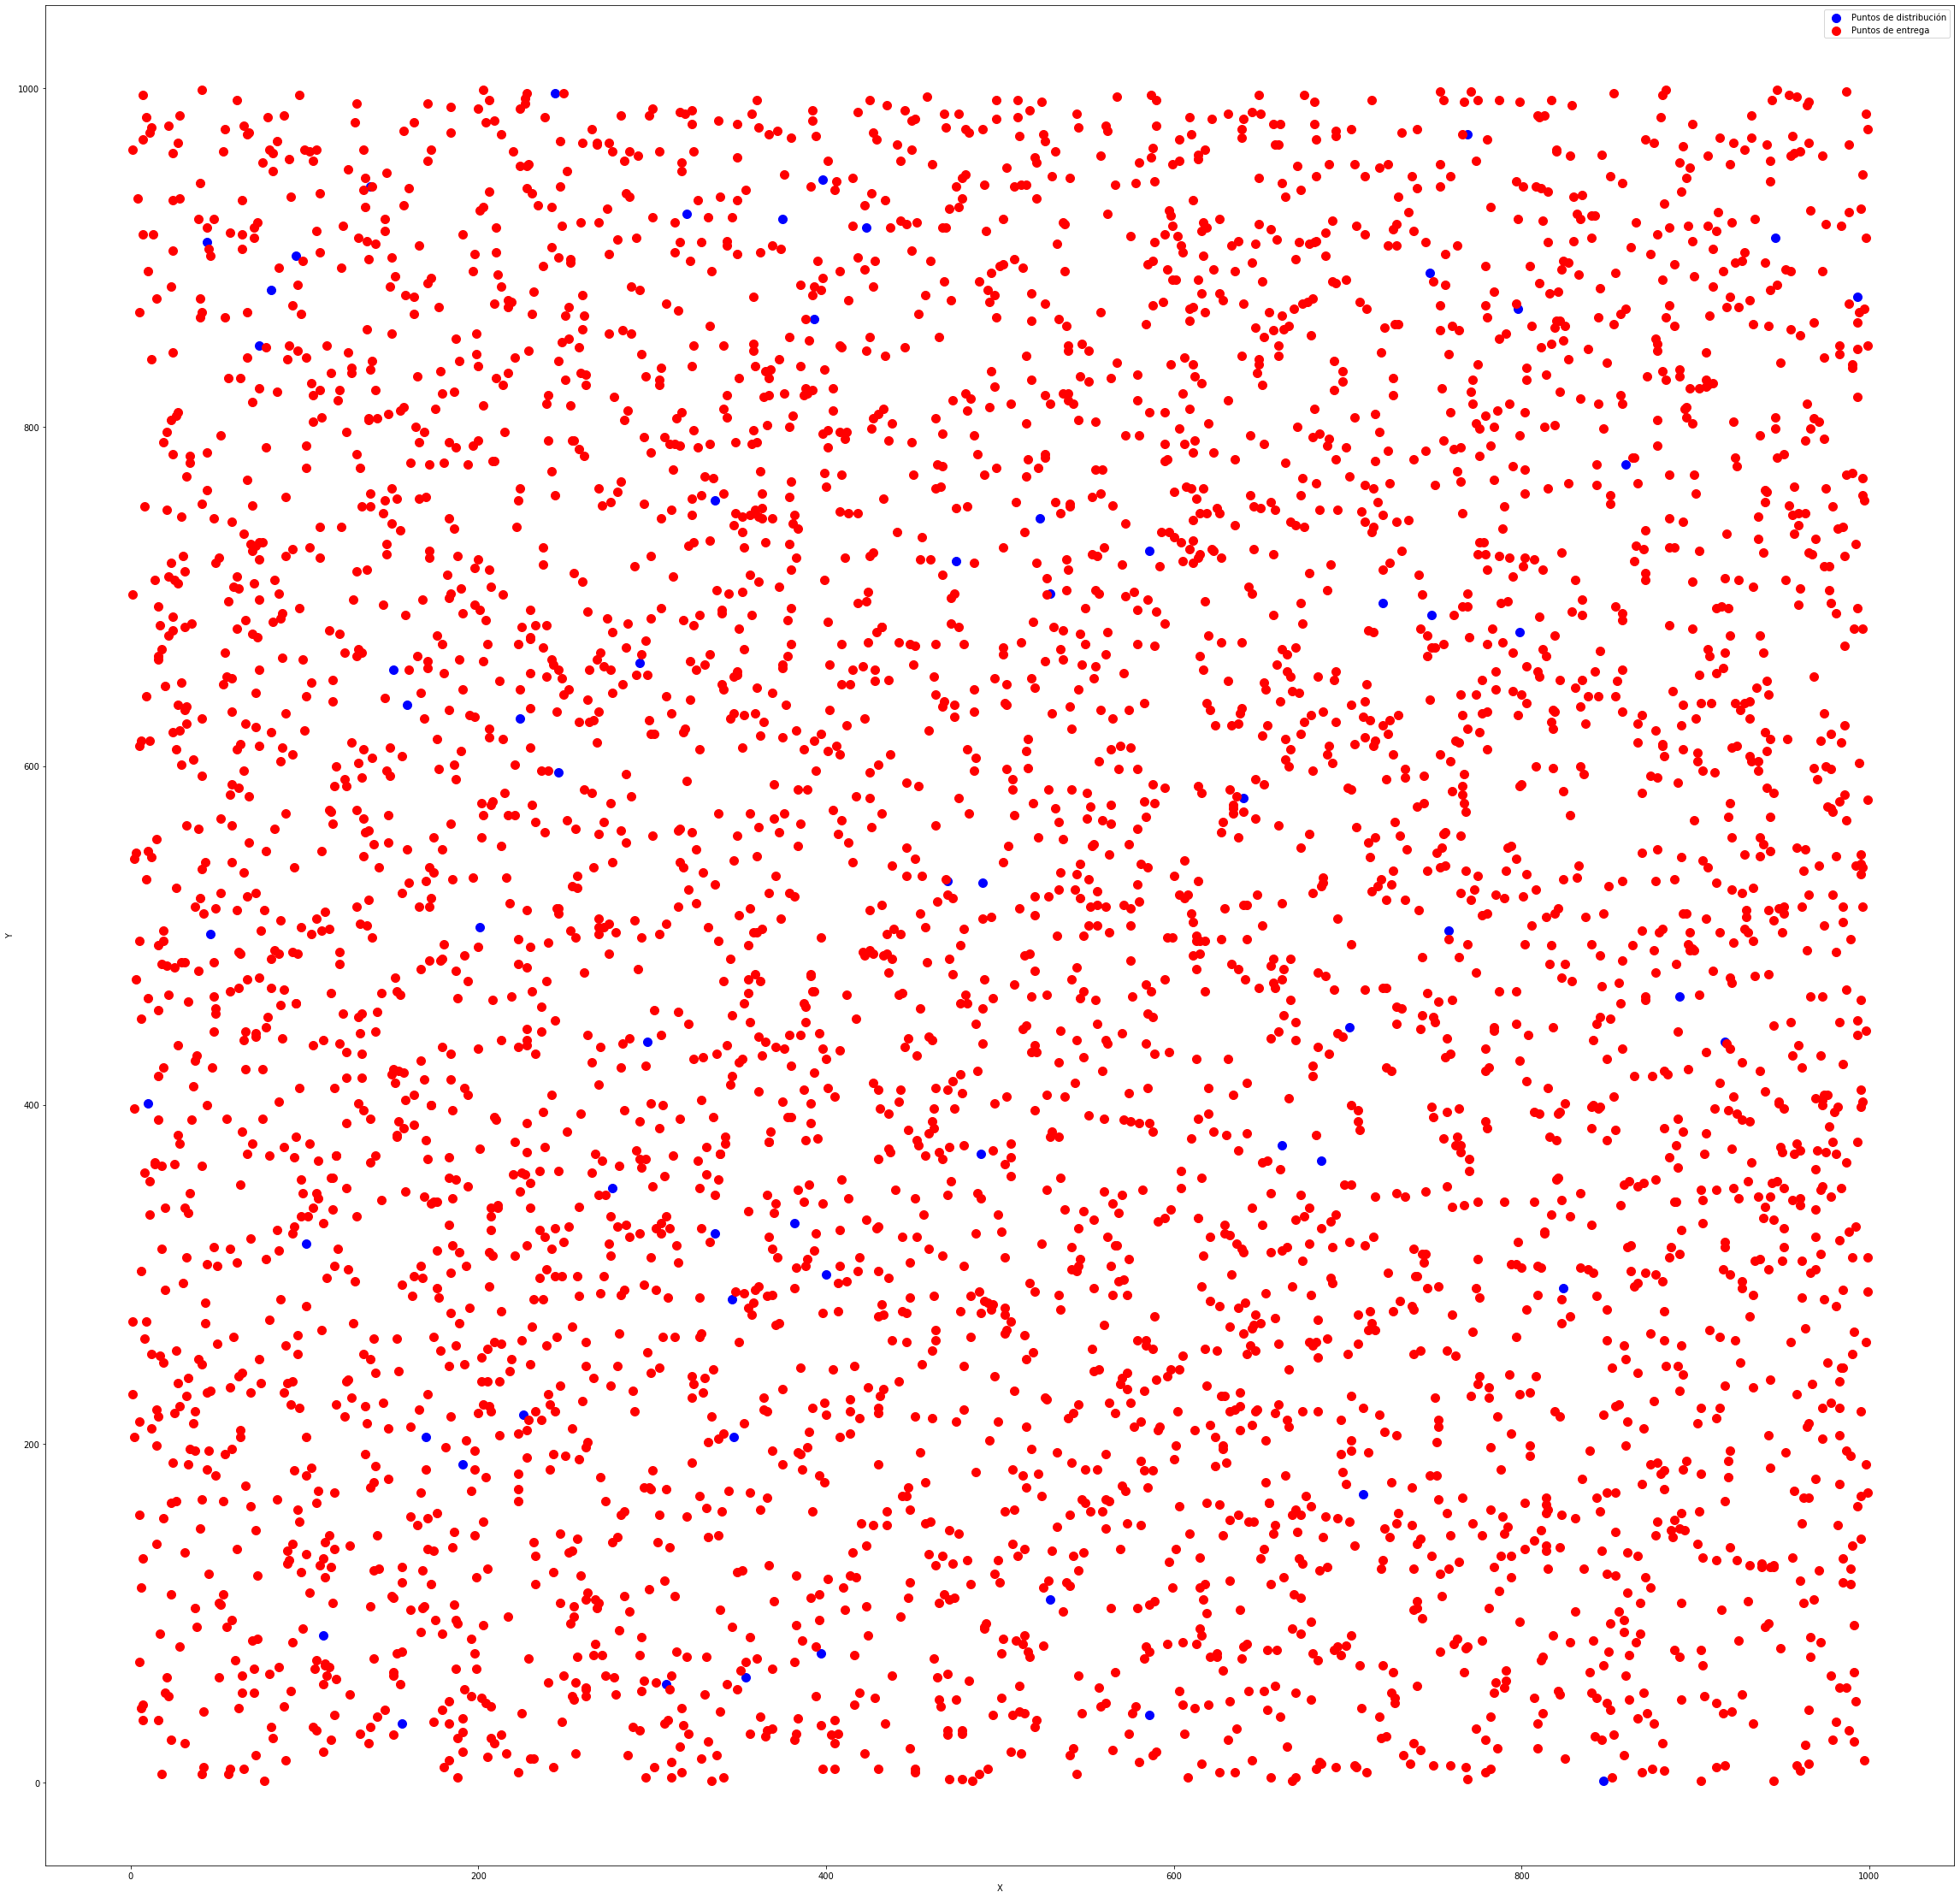

In [9]:
plt.figure(num=1, figsize=(40,40))
plt.scatter(almacenx,almaceny,s=100,color="blue", label="Puntos de distribución")
plt.scatter(entregax,entregay,s=100,color="red", label="Puntos de entrega")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

#Grafos

In [54]:
def setEmptyGraph(side):
  n = side*side
  G = [ [] for _ in range(n) ]
  for i, v in enumerate(G):
    if i - side >= 0 : 
      v.append(i - side)
    if i - 1 >= 0 : 
      v.append(i - 1)
    if i + 1  < n and (i+1)%side != 0 : 
      v.append(i + 1)
    if i + side  < n : 
      v.append(i + side)
  return G

def setKnownPoints(size, almacen, entrega):
  id = [0]*(size*size) #0 is null
  for a in almacen:
    x, y = a[0], a[1]
    pos = x*size + y # function to get position by x and y
    id[pos] = 1 # 1 is almacen
  for a in entrega:
    x, y = a[0], a[1]
    pos = x*size + y # function to get position by x and y
    id[pos] =2 # 2 is delivery node
  return id

#setEmptyGraph(1000)

In [55]:
#Ejemplo de prueba

almacenes = [[0,1],[1,2],[0,0]]
entregas = [[1,0],[1,1]]

size = 3

G = setEmptyGraph(size)
print(G)

print("Separation")

labels = setKnownPoints(size, almacenes, entregas)
print(labels)

[[1, 3], [0, 2, 4], [1, 5], [0, 2, 4, 6], [1, 3, 5, 7], [2, 4, 8], [3, 5, 7], [4, 6, 8], [5, 7]]
Separation
[1, 1, 0, 2, 2, 1, 0, 0, 0]
